In [5]:
import pandas as pd

df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

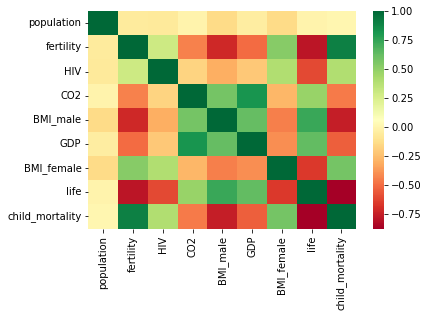

In [10]:
import seaborn as sns

sns.heatmap(df.corr(), cmap='RdYlGn')

0.6192442167740035


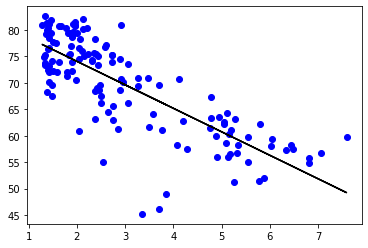

In [2]:
# LINEAR REGRESSION

## prepare data
import numpy as np
import matplotlib.pyplot as plt

one_x = np.array(df['fertility'])[:, None]
y = df['life']

## fit into model
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(one_x, y)
one_feature_score = regression.score(one_x, y)
print(one_feature_score)

## plot
fig, ax = plt.plot(one_x, y, 'bo', one_x, regression.predict(one_x), '-k')

In [3]:
# ALL FEATURE LINEAR REGRESSION

## prepare data
all_x = df[['fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]
y = df['life']

## fit into model
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(all_x, y)
all_features_score = regression.score(all_x, y)

print(f'One feature score: {one_feature_score}')
print(f'All features score: {all_features_score}')

print(f'Model when trained with all features is {"better" if all_features_score > one_feature_score else "worse"} then when train with only fertility')

One feature score: 0.6192442167740035
All features score: 0.8974995317332959
Model when trained with all features is better then when train with only fertility


In [4]:
# CROSS VALIDATION SCORE
from sklearn.model_selection import cross_val_score

cross_val_score(regression, one_x, y, cv=5)

array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])